## #2 MVA diagnostics

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
b001_alfven_files = ['../data/mva/yuguang_161121_B_k_1_1_1000_100.mode1', 
                    '../data/mva/yuguang_161121_B_k_1000_100_10000_215.mode1']
b001_slow_files = ['../data/mva/yuguang_161121_B_k_1_1_1000_100.mode4', 
                    '../data/mva/yuguang_161121_B_k_1000_100_10000_215.mode4']

b1_alfven_files = ['../data/mva/yuguang_161121_A_k_1_1_1000_100.mode1', 
                    '../data/mva/yuguang_161121_A_k_1000_100_10000_215.mode1']
b1_slow_files = ['../data/mva/yuguang_161121_A_k_1_1_1000_100.mode4', 
                    '../data/mva/yuguang_161121_A_k_1000_100_10000_215.mode4']

In [70]:
b001_alfven_data = np.concatenate((np.loadtxt(b001_alfven_files[0]), 
                                  np.loadtxt(b001_alfven_files[1])))
b001_slow_data = np.concatenate((np.loadtxt(b001_slow_files[0]), 
                                  np.loadtxt(b001_slow_files[1])))

b1_alfven_data = np.concatenate((np.loadtxt(b1_alfven_files[0]), 
                                  np.loadtxt(b1_alfven_files[1])))
b1_slow_data = np.concatenate((np.loadtxt(b1_slow_files[0]), 
                                  np.loadtxt(b1_slow_files[1])))

In [77]:
data_list = [b001_alfven_data, b001_slow_data, b1_alfven_data, b1_slow_data]
kperp_list, kpar_list, mva_list = [], [], []
w_list, gamma_list = [], []
for data in data_list:
    kperp = data[:, 0]
    kpar = data[:, 1]
    Ebperp = np.sum( data[:, 6:10]**2 , axis = 1)
    Ebpar = np.sum( data[:, 10:12]**2 , axis = 1)
    mva = Ebperp/Ebpar
    kperp_list.append(kperp)
    kpar_list.append(kpar)
    mva_list.append(mva)
    w_list.append(data[:, 4])
    gamma_list.append(data[:, 5])

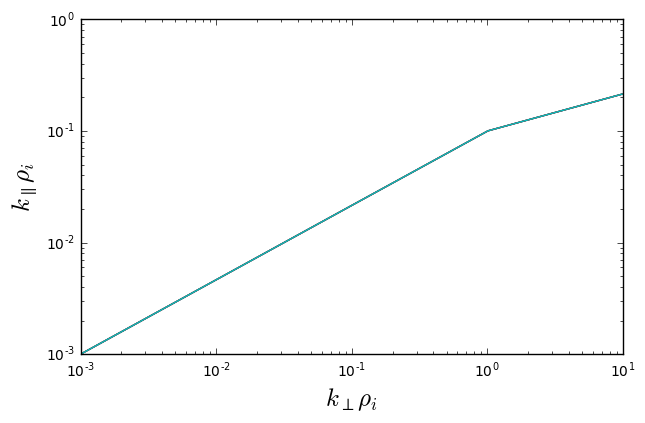

In [103]:
fs = 18
fig = plt.figure(figsize = [7, 4.32])
for i in range(len(kperp_list)):
    plt.plot(kperp_list[i], kpar_list[i])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_\perp \rho_i$', fontsize = fs)
plt.ylabel(r'$k_\parallel \rho_i$', fontsize = fs)
fig.savefig('crit_bal_kperp_kpar.png', dpi = 200)

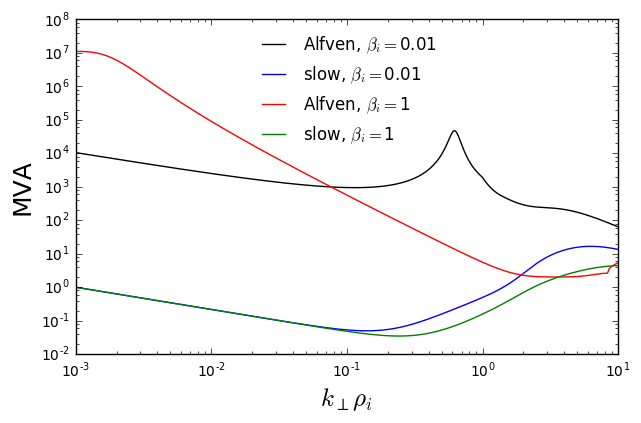

In [107]:
fs = 18
colors = ['black', 'blue', 'red', 'green']
modes = ['Alfven', 'slow', 'Alfven', 'slow']
betas = ['0.01', '0.01', '1', '1']

fig = plt.figure(figsize = [7, 4.32])
for i in range(len(kperp_list)):
    plt.plot(kperp_list[i], mva_list[i], color=colors[i], 
             label = r'{}, $\beta_i = ${}'.format(modes[i], betas[i]))
# plt.xlim(0.1, 10)
# plt.ylim([0.1, 1e6])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_\perp \rho_i$', fontsize = fs)
plt.ylabel('MVA', fontsize = fs)
plt.legend(loc='best', frameon=False)
fig.savefig('crit_bal_mva.png', dpi=200)

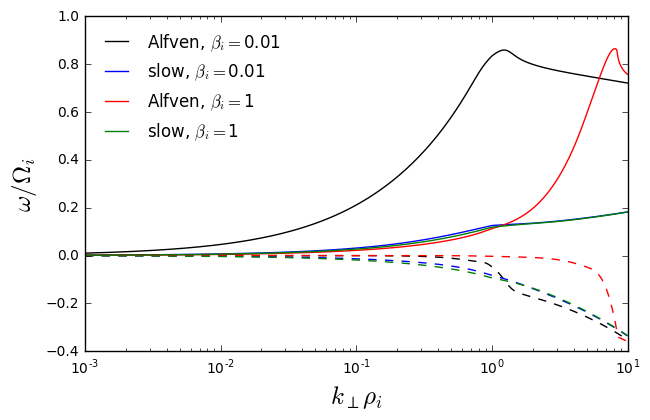

In [105]:
fs = 18
colors = ['black', 'blue', 'red', 'green']
fig = plt.figure(figsize = [7, 4.32])
for i in range(len(kperp_list)):
    plt.plot(kperp_list[i], w_list[i], color = colors[i],
            label = r'{}, $\beta_i = ${}'.format(modes[i], betas[i]))
for i in range(len(kperp_list)):
    plt.plot(kperp_list[i], gamma_list[i], '--', color = colors[i])
plt.xscale('log')
plt.xlabel(r'$k_\perp \rho_i$', fontsize = fs)
plt.ylabel(r'$\omega/\Omega_i$', fontsize = fs)
plt.legend(loc='best', frameon=False)
fig.savefig('crit_bal_disp_rel.png', dpi = 200)

In [102]:
# !rm *png

In [106]:
pwd

'/Volumes/yuguang_sd/report/laplace_fourier_analysis/python/Draft'